In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cars.csv")

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


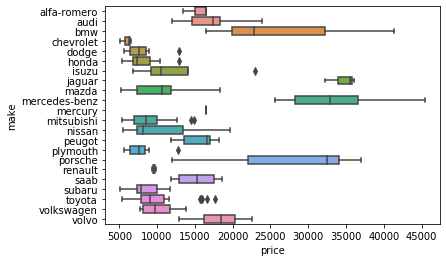

In [3]:
sns.boxplot(data =df,y='make',x='price')
plt.show()

In [26]:
def get_whishker(df):
    q1=np.quantile(df,0.25)
    q3=np.quantile(df,0.75)
    iqr=q3-q1
    uw=q3+(1.5*iqr)
    lw=q1-(1.5*iqr)
    return uw,lw

def remove_outlier(df,make):
    uw,lw=get_whishker(df[make])
    index_list=[]
    for m in df[make]:
        if m > uw:
            index = df.index[df[make] == m].tolist()[0]
            index_list.append(index)
            #df.drop(index,inplace =True)
            
        elif m < lw:
            index =df.index[df[make] == m].tolist()[0]
            index_list.append(index)
            #df.drop(index,inplace =True)
        else:
            pass
    return index_list

In [27]:
makes = df['make'].unique().tolist()

In [28]:
for m in makes:
    indexs = remove_outlier(df[df['make'] == m],'price')
    df.drop(indexs ,inplace =True)

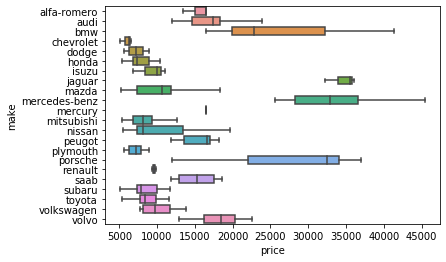

In [30]:
sns.boxplot(data=df,x='price',y='make')
plt.show()